<a href="https://colab.research.google.com/github/Pablo-AS35/Accidentes2022-2024/blob/main/ProyectoParte_III_Arce_Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de Accidentes de Tránsito en 8 países, incidencias de los diferentes factores que se ven involucrados en su ocurrencia.**

**1. Introducción**

Los accidentes de tránsito en general representan una cantidad importante de heridos y fallecidos en el mundo, donde se ven involucrados pasajeros de los vehículos involucrados, peatones y en algunos casos ciclistas. Entre 2020 y 2024, países como Brasil, Rusia, China, Estados Unidos, Reino Unido, India, Japón y Canadá han registrado un alto número de accidentes de tránsito, cada uno con factores específicos que influyen en su ocurrencia, como las condiciones climáticas, la velocidad que transitaban los vehículos que provocaron el accidente, entre otros. Este proyecto, busca analizar la implicancia que tienen los diversos factores que condicionan la ocurrencia de los accidentes, donde cada accidente tiene su tipo de gravedad y, además en cada accidente se ven involucradas personas, teniendo como resultado número de heridos y fallecidos. Los factores que se analizaran son: la zona de ocurrencia (rural o urbana), el tipo de camino donde ocurren los accidentes, las condiciones climáticas de cuando ocurrió el accidente, el sexo y edad del conductor que provoca el accidente, y las causas del accidente.

**2. Objetivo del Proyecto**

El objetivo del presente proyecto, es analizar los impactos en la gravedad de los accidentes de tránsito, considerando como datos, los accidentes ocurridos en ocho países (Brasil, Rusia, China, Estados Unidos, Reino Unido, India, Japón y Canadá) entre los años 2020 y 2024. Se espera identificar los factores más importantes y analizar la cantidad de involucrados, que resultan de la ocurrencia de los accidentes.

**3. Preguntas e Hipótesis**

Preguntas que se podrían analizar para el presente proyecto.

1- ¿Qué condiciones climáticas presentan un mayor porcentaje de accidentes graves? Se busca evaluar si hay una relación entre el tipo de clima y la gravedad del accidente.

2- ¿Existe una relación entre el sexo y edad del conductor con la gravedad del accidente? Se analiza si ciertos perfiles de conductores están más asociados a accidentes graves.

3- ¿La zona de ocurrencia (urbana o rural) influye en la gravedad del accidente? Se comparan los porcentajes de gravedad entre áreas rurales y urbanas.

4- ¿Qué causas de accidentes son más frecuentes en cada país? Se identifican los factores más comunes reportados como origen del accidente en distintos países.

**4. Hipótesis, para el presente proyecto.**

1- Los accidentes ocurridos en condiciones climáticas adversas (como niebla, lluvia  o nieve) tienen mayor probabilidad de ser clasificados como graves.

2- Los conductores jóvenes (menores de 30 años) y de sexo masculino están más involucrados en accidentes graves debido a comportamientos de mayor riesgo.

3- Los accidentes ocurridos en zonas rurales presentan mayor proporción de gravedad que los ocurridos en zonas urbanas, por la velocidad y tipo de vía.

4- La causa del accidente varía por país, pero factores como error humano (que considera exceso de velocidad, conducción distraída o en estado de ebriedad) predominan como desencadenantes en los accidentes más graves.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Pablo-AS35/Accidentes2022-2024/refs/heads/main/Accidentes_2022-2024.csv'
df_data = pd.read_csv(url)

In [2]:
df_data = pd.read_csv(url, delimiter=';', encoding='latin1')

In [3]:
df_data.head()

,N_Accidente,Pais,Ciudad,Fecha,Horario_de_ocurrencia,Urbano/Rural,Tipo_de_Camino,Condiciones_climaticas,Numero_de_vehiculos_involucrados,Velocidad_Limite,Edad_del_conductor,Sexo_del_conductor,Peatones_involucrados,Ciclistas_involucrados,Accidente_Grave,Numero_de_lesiones,Numero_de_muertes,Causa_del_accidente,Riesgo_peatones,Joven_inexperto
0,1,Brasil,Puerto Alegre,31-01-2022,Manana,Urbano,Calle,Lluvioso,3,66,42,Femenino,2,1,No grave,8,3,Clima,132,No
1,2,Brasil,Puerto Alegre,02-05-2022,Manana,Urbano,Calle,Lluvioso,4,79,16,Masculino,1,0,Grave,0,2,Falla tecnica,79,Si
2,3,Brasil,Puerto Alegre,31-03-2022,Manana,Urbano,Calle,Nevoso,1,105,31,Masculino,2,0,Grave,3,2,Error humano,210,No
3,4,Brasil,Belo Horizonte,03-07-2022,Noche,Rural,Carretera,Neblinoso,4,56,56,Masculino,0,0,No grave,6,1,Falla tecnica,0,No
4,5,Brasil,Puerto Alegre,02-05-2022,Noche,Urbano,Carretera,Neblinoso,1,42,62,Femenino,0,1,Grave,1,1,Error humano,0,No


In [4]:
# Dimensiones del Dataset
df_data.shape

(12425, 20)

**Etapa de Data Wrangling**

Se procede a verificar la existencia de valores nulos dentro del archivo Accidentes 2022-2024.

In [5]:
df_data.isnull().sum()

,0
N_Accidente,0
Pais,0
Ciudad,0
Fecha,0
Horario_de_ocurrencia,0
Urbano/Rural,0
Tipo_de_Camino,0
Condiciones_climaticas,0
Numero_de_vehiculos_involucrados,0
Velocidad_Limite,0


In [6]:
# Tipos de Datos en Dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12425 entries, 0 to 12424
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   N_Accidente                        12425 non-null  int64 
 1   Pais                               12425 non-null  object
 2   Ciudad                             12425 non-null  object
 3   Fecha                              12425 non-null  object
 4   Horario_de_ocurrencia              12425 non-null  object
 5   Urbano/Rural                       12425 non-null  object
 6   Tipo_de_Camino                     12425 non-null  object
 7   Condiciones_climaticas             12425 non-null  object
 8   Numero_de_vehiculos_involucrados   12425 non-null  int64 
 9   Velocidad_Limite                   12425 non-null  int64 
 10  Edad_del_conductor                 12425 non-null  int64 
 11  Sexo_del_conductor                 12425 non-null  object
 12  Peat

In [7]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Accidente,12425.0,6213.000000,3586.932882,1.0,3107.0,6213.0,9319.0,12425.0
Numero_de_vehiculos_involucrados,12425.0,2.484909,1.107161,1.0,2.0,2.0,3.0,4.0
Velocidad_Limite,12425.0,74.238310,25.928426,30.0,52.0,74.0,97.0,119.0
Edad_del_conductor,12425.0,38.019718,19.584089,16.0,19.0,33.0,56.0,75.0
Peatones_involucrados,12425.0,0.991147,0.813947,0.0,0.0,1.0,2.0,2.0
Ciclistas_involucrados,12425.0,0.993642,0.817277,0.0,0.0,1.0,2.0,2.0
Numero_de_lesiones,12425.0,9.530785,5.756589,0.0,5.0,10.0,15.0,19.0
Numero_de_muertes,12425.0,1.989859,1.411500,0.0,1.0,2.0,3.0,4.0
Riesgo_peatones,12425.0,73.838229,69.244238,0.0,0.0,68.0,114.0,238.0


In [8]:
df_data.drop_duplicates()

,N_Accidente,Pais,Ciudad,Fecha,Horario_de_ocurrencia,Urbano/Rural,Tipo_de_Camino,Condiciones_climaticas,Numero_de_vehiculos_involucrados,Velocidad_Limite,Edad_del_conductor,Sexo_del_conductor,Peatones_involucrados,Ciclistas_involucrados,Accidente_Grave,Numero_de_lesiones,Numero_de_muertes,Causa_del_accidente,Riesgo_peatones,Joven_inexperto
0,1,Brasil,Puerto Alegre,31-01-2022,Manana,Urbano,Calle,Lluvioso,3,66,42,Femenino,2,1,No grave,8,3,Clima,132,No
1,2,Brasil,Puerto Alegre,02-05-2022,Manana,Urbano,Calle,Lluvioso,4,79,16,Masculino,1,0,Grave,0,2,Falla tecnica,79,Si
2,3,Brasil,Puerto Alegre,31-03-2022,Manana,Urbano,Calle,Nevoso,1,105,31,Masculino,2,0,Grave,3,2,Error humano,210,No
3,4,Brasil,Belo Horizonte,03-07-2022,Noche,Rural,Carretera,Neblinoso,4,56,56,Masculino,0,0,No grave,6,1,Falla tecnica,0,No
4,5,Brasil,Puerto Alegre,02-05-2022,Noche,Urbano,Carretera,Neblinoso,1,42,62,Femenino,0,1,Grave,1,1,Error humano,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12420,12421,EE.UU,San Francisco,07-05-2024,Tarde,Rural,Carretera,Lluvioso,2,54,65,Femenino,2,1,Grave,1,0,Error humano,108,No
12421,12422,EE.UU,San Francisco,12-02-2024,Manana,Urbano,Calle,Lluvioso,3,116,21,Masculino,2,0,Grave,2,4,Error humano,232,Si
12422,12423,EE.UU,Los angeles,12-12-2024,Noche,Urbano,Calle,Neblinoso,2,99,18,Femenino,1,0,Grave,8,2,Error humano,99,Si
12423,12424,EE.UU,Miami,12-03-2024,Tarde,Urbano,Carretera,Despejado,3,108,31,Femenino,2,1,Grave,17,0,Error humano,216,No


In [9]:
import datetime as dt
import calendar
import plotly.express as px

In [10]:
df_data['Fecha'] = pd.to_datetime(df_data['Fecha'])
df_data['Months'] = df_data['Fecha'].dt.month
df_data['Month_name'] = df_data['Months'].apply(lambda x: calendar.month_name[x])

<ipython-input-10-4446f8e6429a>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data['Fecha'] = pd.to_datetime(df_data['Fecha'])


In [11]:
df_data['Fecha'] = pd.to_datetime(df_data['Fecha'], format='%d/%m/%Y')

In [12]:
print(df_data[['Fecha', 'Months', 'Month_name']].head())

       Fecha  Months Month_name
0 2022-01-31       1    January
1 2022-05-02       5        May
2 2022-03-31       3      March
3 2022-07-03       7       July
4 2022-05-02       5        May


In [13]:
# Preparando el Dataset pasa su análisis
df_data['Fecha'] = pd.to_datetime(df_data['Fecha'], errors='coerce')

# Agregando columna de número de mes
df_data['Months'] = df_data['Fecha'].dt.month

# Obtener nombre del mes en español
meses_en_español = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
df_data['Month_name'] = df_data['Months'].map(meses_en_español)

# Agregando columnas de año y mes
df_data['yy'] = df_data['Fecha'].dt.strftime('%Y')
df_data['mm'] = df_data['Fecha'].dt.strftime('%m')

In [14]:
df_data.head()

,N_Accidente,Pais,Ciudad,Fecha,Horario_de_ocurrencia,Urbano/Rural,Tipo_de_Camino,Condiciones_climaticas,Numero_de_vehiculos_involucrados,Velocidad_Limite,...,Accidente_Grave,Numero_de_lesiones,Numero_de_muertes,Causa_del_accidente,Riesgo_peatones,Joven_inexperto,Months,Month_name,yy,mm
0,1,Brasil,Puerto Alegre,2022-01-31,Manana,Urbano,Calle,Lluvioso,3,66,...,No grave,8,3,Clima,132,No,1,Enero,2022,01
1,2,Brasil,Puerto Alegre,2022-05-02,Manana,Urbano,Calle,Lluvioso,4,79,...,Grave,0,2,Falla tecnica,79,Si,5,Mayo,2022,05
2,3,Brasil,Puerto Alegre,2022-03-31,Manana,Urbano,Calle,Nevoso,1,105,...,Grave,3,2,Error humano,210,No,3,Marzo,2022,03
3,4,Brasil,Belo Horizonte,2022-07-03,Noche,Rural,Carretera,Neblinoso,4,56,...,No grave,6,1,Falla tecnica,0,No,7,Julio,2022,07
4,5,Brasil,Puerto Alegre,2022-05-02,Noche,Urbano,Carretera,Neblinoso,1,42,...,Grave,1,1,Error humano,0,No,5,Mayo,2022,05


**VISUALIZACIONES GENERALES**

In [15]:
#segmentacion dataframe df_lesionados
df_lesionados = df_data.filter(['yy', 'Month_name', 'mm', 'Numero_de_lesiones'], axis=1)
df_lesionados['yy'] = df_lesionados['yy'].astype(int)
df_lesionados = df_lesionados.groupby(['yy', 'mm', 'Month_name'])['Numero_de_lesiones'].agg('sum').round(1).reset_index()
df_lesionados

,yy,mm,Month_name,Numero_de_lesiones
0,2022,01,Enero,3149
1,2022,02,Febrero,3354
2,2022,03,Marzo,3114
3,2022,04,Abril,3730
4,2022,05,Mayo,3201
5,2022,06,Junio,2999
6,2022,07,Julio,3582
7,2022,08,Agosto,3124
8,2022,09,Septiembre,3096
9,2022,10,Octubre,3603


In [16]:
df_lesionados=df_lesionados.drop("mm",axis=1)
df_lesionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   yy                  36 non-null     int64 
 1   Month_name          36 non-null     object
 2   Numero_de_lesiones  36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 996.0+ bytes


In [17]:
# Segmentacion dataframe df_fallecidos
df_fallecidos = df_data.filter(['yy', 'Month_name', 'mm', 'Numero_de_muertes'], axis=1)
df_fallecidos['yy'] = df_fallecidos['yy'].fillna(0).astype(int)
df_fallecidos = df_fallecidos.groupby(['yy', 'mm', 'Month_name'])['Numero_de_muertes'].agg('sum').round(1).reset_index()
df_fallecidos

,yy,mm,Month_name,Numero_de_muertes
0,2022,01,Enero,679
1,2022,02,Febrero,657
2,2022,03,Marzo,621
3,2022,04,Abril,762
4,2022,05,Mayo,728
5,2022,06,Junio,643
6,2022,07,Julio,745
7,2022,08,Agosto,706
8,2022,09,Septiembre,652
9,2022,10,Octubre,710


In [18]:
df_fallecidos=df_fallecidos.drop("mm",axis=1)
df_fallecidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   yy                 36 non-null     int64 
 1   Month_name         36 non-null     object
 2   Numero_de_muertes  36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 996.0+ bytes


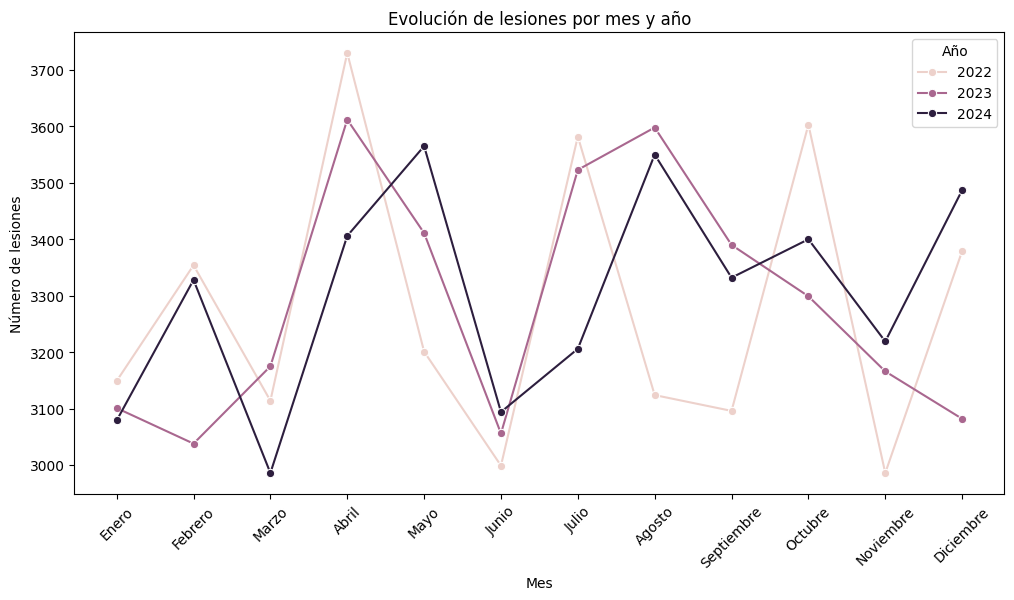

In [19]:
# Gráfico de líneas: Lesiones por mes y año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_lesionados, x='Month_name', y='Numero_de_lesiones', hue='yy', marker='o')
plt.title('Evolución de lesiones por mes y año')
plt.xlabel('Mes')
plt.ylabel('Número de lesiones')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.show()

El gráfico de líneas anterior **'Evolución de lesiones por mes y año'**, muestra la evolución del número de lesiones por accidentes de tráfico a lo largo de los meses de los años 2022, 2023 y 2024.
Por cada año se observa lo siguiente:

- **2022 (línea naranja)**: El número de lesiones fluctúa entre 3100 y 3700, siendo el mes de abril el más considerable (alrededor de 3700 lesiones) y un mínimo en junio (cerca de 3000). La misma baja se ve presente en el mes de noviembre del 2022.
- **2023 (línea morada)**: Las lesiones alcanzan su máximo también en el mes de abril (aproximadamente 3600), y un mínimo en febrero, junio y diciembre (alrededor de 3100). Hay otro aumento de lesionados en agosto (cerca de 3600).
- **2024 (línea negra)**: Las lesiones son variables, fluctuando entre 3000 y 3600. El aumento significativo ocurre en mayo (aproximadamente 3600), mientras que el mínimo se observa en marzo y junio.

**Patrones generales**:
- Abril es un mes con un alto número de lesiones en 2022 y 2023, lo que podría estar relacionado con que existieron más factores involucrados en la incidencia de Accidentes.
- Junio muestra un descenso en lesiones en los tres años.
- 2023 tiene la mayor variabilidad, con aumentos y caídas más pronunciadas.

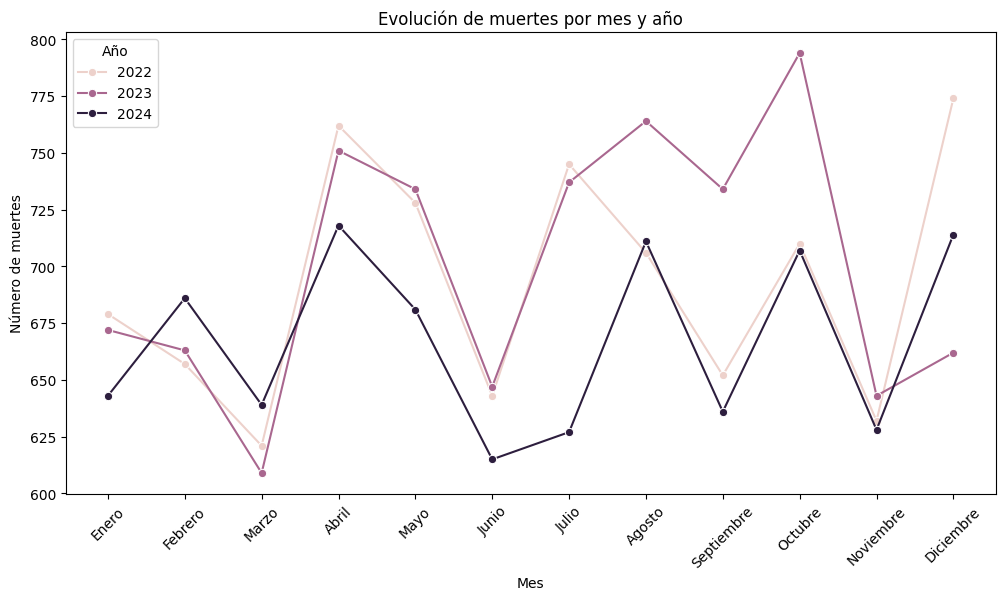

In [20]:
# Gráfico de líneas: Muertes por mes y año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fallecidos, x='Month_name', y='Numero_de_muertes', hue='yy', marker='o')
plt.title('Evolución de muertes por mes y año')
plt.xlabel('Mes')
plt.ylabel('Número de muertes')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.show()

El gráfico de líneas anterior 'Evolución de muertes por mes y año', muestra la evolución del número de fallecidos por accidentes de tráfico a lo largo de los meses de los años 2022, 2023 y 2024. Por cada año se observa lo siguiente:

**- 2022 (línea naranja)**: El número de fallecidos fluctúa entre 600 y 800, siendo el mes de abril el más considerable (alrededor de 750 fallecidos) y un mínimo en marzo (cerca de 625 fallecidos). La misma baja se ve presente en el mes de noviembre del 2022.

**- 2023 (línea morada)**: Los fallecidos alcanzan su máximo en el mes de octubre (aproximadamente 800 fallecidos), y un mínimo en marzo (alrededor de 600).

**- 2024 (línea negra)**: La cantidad de fallecidos fluctua entre los 600 y 725
fallecidos. El aumento significativo ocurre en abril (aproximadamente 725 fallecidos), mientras que el mínimo se observa en junio, julio y noviembre del 2024.

Patrones generales:

En el año 2023, existen meses donde existieron lo máximo en cantidad de fallecidos, principalmente octubre.

2023 tiene la mayor variabilidad, con aumentos y caídas más pronunciadas.

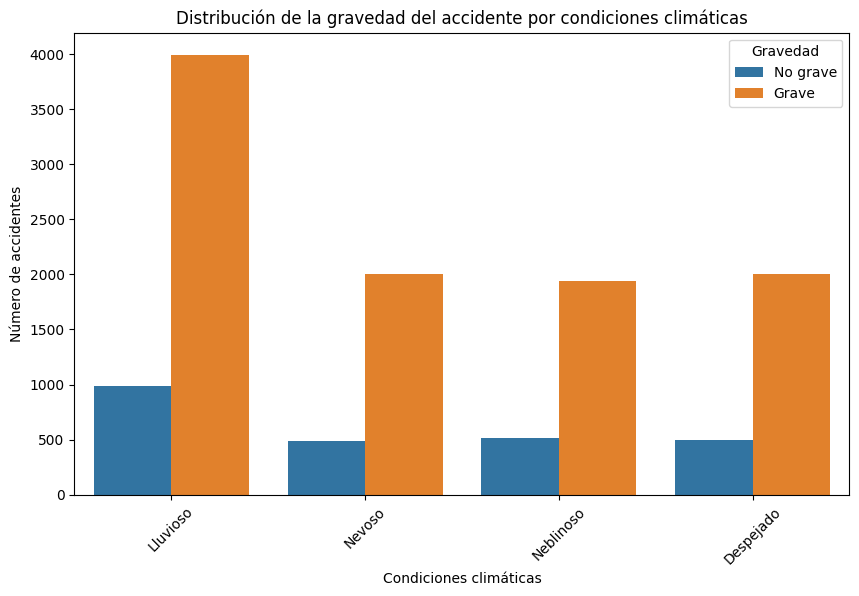

In [21]:
# Gráfico de barras apiladas: Condiciones climáticas vs. Gravedad
plt.figure(figsize=(10, 6))
sns.countplot(data=df_data, x='Condiciones_climaticas', hue='Accidente_Grave')
plt.title('Distribución de la gravedad del accidente por condiciones climáticas')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Gravedad')
plt.show()

El gráfico de barras apiladas muestra la distribución de la gravedad de los accidentes (no graves y graves) según las condiciones climáticas (lluvioso, nevoso, neblinoso, despejado). Las observaciones principales son:

- **Lluvioso**: La mayoría de los accidentes son graves(aproximadamente 4000),en cambio los no grave son (alrededor de 1000). Esto indica que los accidentes en días lluviosos son frecuentes y presentan mayor cantidad de ocurrencia, donde tienden a ser graves.
- **Nevoso**: Las condiciones de nieve, afectan también en la gravedad de ocurrencia en los accidentes, donde los accidentes graves son casi 2000, en cambio los accidentes que ocurren por climas con nieve que no son graves, representan solo 500.
- **Neblinoso**: Al igual que los accidentes con clima nevoso, el clima neblinoso tiene similitud de ocurrencia en los accidentes, donde los categorizados como grave representan casi 2000 accicentes y los no grave representan casi 500 accidentes.
- **Despejado**: La distribución es similar al clima nevoso y neblinoso, donde los categorizados como grave representan casi 2000 accicentes y los no grave representan casi 500 accidentes.

**Patrones generales**:
- Los accidentes de gravedad son los más frecuentes, en días lluviosos.
- Las condiciones de clima nevoso, despejado y neblinoso, representan casi la misma distribución de accidentes, donde la gravedad de ellos representan en cada uno 2000 accidentes de mayor gravedad y no graves con casi 500 accidentes ocurridos.


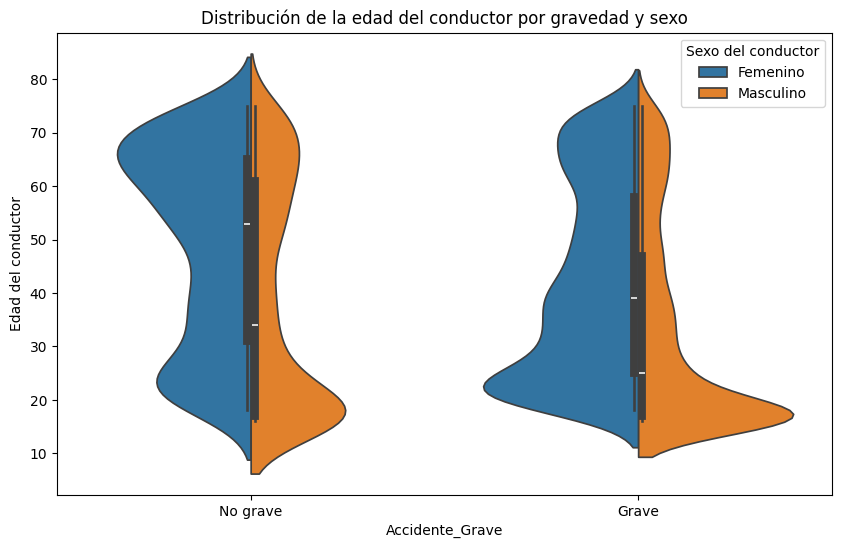

In [22]:
# Gráfico de violín: Distribución de Edad del conductor por Gravedad y Sexo
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_data,
    x='Accidente_Grave',
    y='Edad_del_conductor',
    hue='Sexo_del_conductor',
    split=True
)
plt.title('Distribución de la edad del conductor por gravedad y sexo')
plt.xlabel('Accidente_Grave')
plt.ylabel('Edad del conductor')
plt.legend(title='Sexo del conductor')
plt.show()

La distribución de la edad del conductor según la gravedad del accidente (Grave o No grave). Se puede observar que los accidentes graves, tanto hombres como mujeres tienden a concentrarse en edades más jóvenes y los accidentes no graves, hay mayor presencia de conductores de edad más avanzada.

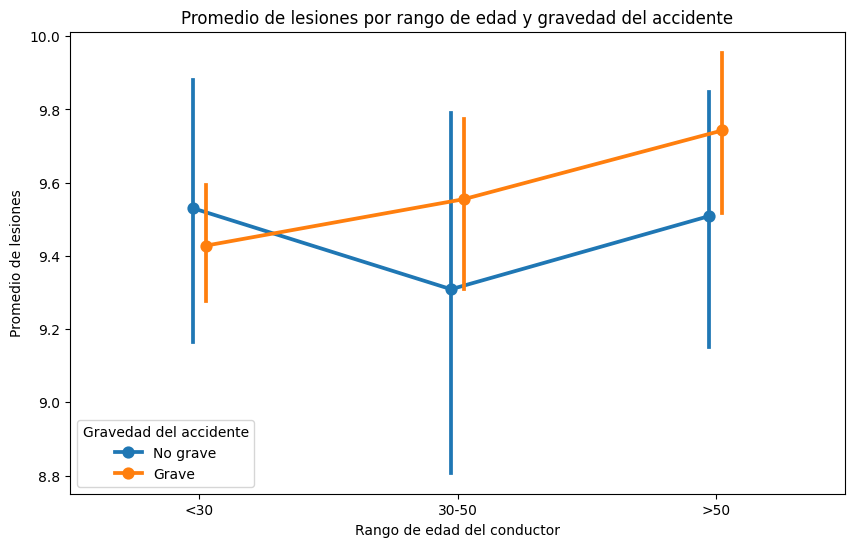

In [23]:
# Gráfico de puntos: Promedio de lesiones por Edad del conductor (binned) y Sexo
df_data['Edad_binned'] = pd.cut(df_data['Edad_del_conductor'], bins=[0, 30, 50, 100], labels=['<30', '30-50', '>50'])

plt.figure(figsize=(10, 6))
sns.pointplot(
    data=df_data,
    x='Edad_binned',
    y='Numero_de_lesiones',
    hue='Accidente_Grave',
    dodge=True
)
plt.title('Promedio de lesiones por rango de edad y gravedad del accidente')
plt.xlabel('Rango de edad del conductor')
plt.ylabel('Promedio de lesiones')
plt.legend(title='Gravedad del accidente')
plt.show()

Promedio de lesiones por rango de edad del conductor y gravedad del accidente. Se puede señalar que el promedio de lesiones es ligeramente mayor en accidentes graves para todos los grupos de edad. A medida que aumenta la edad del conductor, el promedio de lesiones también aumenta ligeramente, especialmente en accidentes graves.

In [24]:
# Gráfico de barras agrupadas con Plotly
fig = px.bar(
    df_data.groupby(['Accidente_Grave', 'Sexo_del_conductor'])['Numero_de_lesiones'].mean().reset_index(),
    x='Accidente_Grave',
    y='Numero_de_lesiones',
    color='Sexo_del_conductor',
    barmode='group',
    title='Promedio de lesiones por gravedad y sexo del conductor'
)
fig.update_layout(
    xaxis_title='Gravedad del accidente',
    yaxis_title='Promedio de lesiones',
    legend_title='Sexo del conductor'
)
fig.show()

Promedio de lesiones por gravedad y sexo del conductor. Se puede señalar que en accidentes graves, las mujeres presentan un promedio de lesiones levemente menor que los hombres (9.53). Y en los accidentes no graves, las mujeres también tienen un promedio ligeramente inferior al de los hombres.

<Figure size 800x400 with 0 Axes>

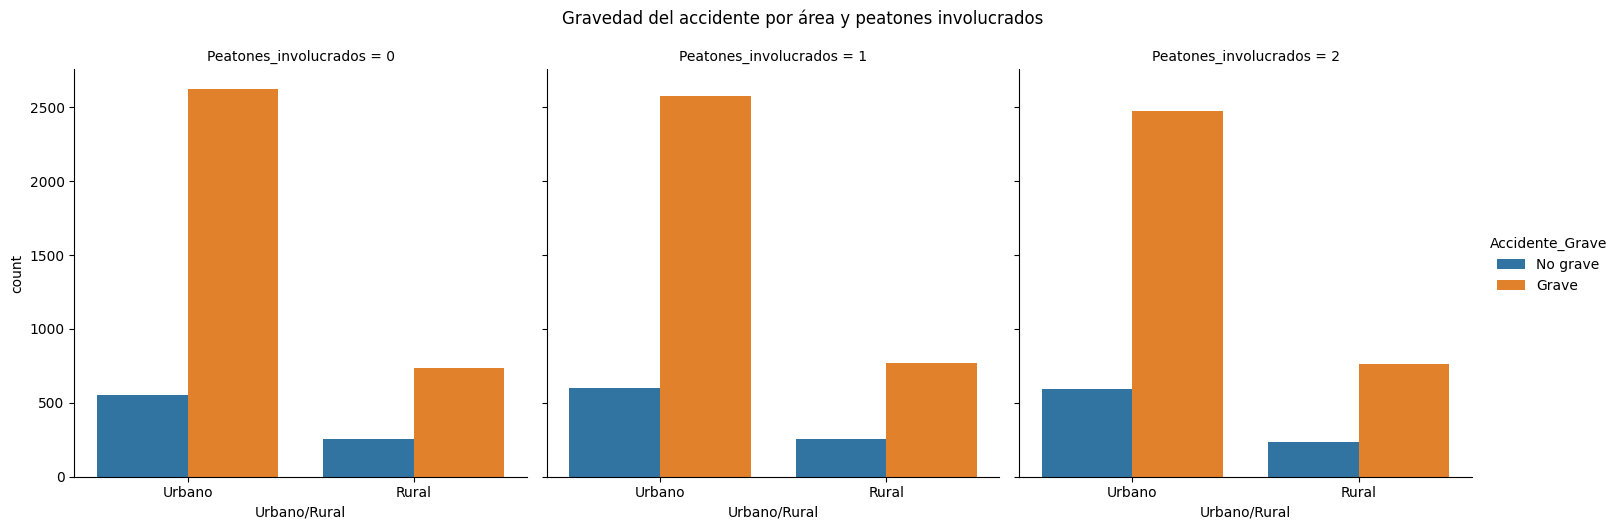

In [25]:
# Gráfico de barras con Seaborn: Urbano/Rural, peatones y gravedad
plt.figure(figsize=(8, 4))
sns.catplot(data=df_data, x='Urbano/Rural', hue='Accidente_Grave',
            col='Peatones_involucrados', kind='count', height=5, aspect=1)
plt.suptitle('Gravedad del accidente por área y peatones involucrados', y=1.05)
plt.show()

Gravedad del accidente por tipo de área (Urbano/Rural) y número de peatones involucrados. Se puede señalar que en zonas urbanas, hay una mayor cantidad de accidentes graves. En zonas rurales, también predominan los accidentes graves, aunque en menor volumen que en zonas urbanas.Y a medida que aumenta el número de peatones involucrados, no cambia drásticamente la proporción entre accidentes graves y no graves, pero sí se mantiene más alta la cantidad de accidentes graves en todas las categorías.

###**Proceso de entrenamiento y prueba del dataset - Machine Learning**

In [26]:
#Carga y preprocesamiento del dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [27]:
# Carga de datos
df = pd.read_csv("https://raw.githubusercontent.com/Pablo-AS35/Accidentes2022-2024/refs/heads/main/Accidentes_2022-2024.csv", delimiter=';', encoding='latin1')



In [28]:
# Eliminar columnas no útiles
cols_a_eliminar = ['N_Accidente', 'Ciudad', 'Fecha']
df = df.drop(columns=[col for col in cols_a_eliminar if col in df.columns])



In [29]:
# Codificar variables categóricas
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])



In [30]:
# Variables predictoras y objetivo
X = df_encoded.drop(columns=['Accidente_Grave'])
y = df_encoded['Accidente_Grave']



In [31]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [32]:
# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [33]:
# Evaluación
print("CLASIFICACIÓN - ACCIDENTE GRAVE")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

CLASIFICACIÓN - ACCIDENTE GRAVE
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2996
           1       0.62      0.39      0.48       732

    accuracy                           0.83      3728
   macro avg       0.74      0.67      0.69      3728
weighted avg       0.82      0.83      0.82      3728

[[2819  177]
 [ 445  287]]



## Conclusión del modelo de clasificación

El modelo final de clasificación binaria (`Accidente_Grave`) fue entrenado utilizando un algoritmo de Random Forest sobre los datos originales.

### Resultados principales:
- **Accuracy general:** 83%
- **F1-score clase 'No grave':** 0.90
- **F1-score clase 'Grave':** 0.48
- **Matriz de confusión:**
  ```
  [[2819  177]
   [ 445  287]]
  ```

### Análisis:
- El modelo identifica con mayor precisión los accidentes **no graves** (recall de 94%), lo cual es esperable dada su mayor representación en los datos.
- El desempeño en la clase **grave** es aceptable. Con un recall del 39%, logra detectar casi 4 de cada 10 accidentes graves.
- La precisión en accidentes de clase grave representa un (62%) de presición,  cuando el modelo predice un accidente grave, acierta 6 de cada 10 veces.

### Conclusión:
El modelo entrega una clasificación confiable en contextos donde se busca una **alta certeza en la predicción de casos no graves**.

## Análisis de preguntas del proyecto

### 1. ¿Qué condiciones climáticas están más asociadas con accidentes graves?
Se analiza el porcentaje de accidentes graves según la condición climática registrada.

In [34]:

# Convertir etiquetas de gravedad si están en texto
if df_data['Accidente_Grave'].dtype == 'object':
    df_data['Accidente_Grave'] = df_data['Accidente_Grave'].map({'No grave': 0, 'Grave': 1})

cond_clima_gravedad = df_data.groupby(['Condiciones_climaticas', 'Accidente_Grave']).size().unstack(fill_value=0)
cond_clima_gravedad['Porcentaje_Graves'] = cond_clima_gravedad[1] / (cond_clima_gravedad[0] + cond_clima_gravedad[1]) * 100
cond_clima_gravedad.sort_values('Porcentaje_Graves', ascending=False)


Accidente_Grave,0,1,Porcentaje_Graves
Condiciones_climaticas,,,
Nevoso,490,2004,80.352847
Lluvioso,984,3995,80.236995
Despejado,497,2001,80.104083
Neblinoso,515,1939,79.013855


### Gravedad por condiciones climáticas (barras)

<ipython-input-35-ea527719eeb8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




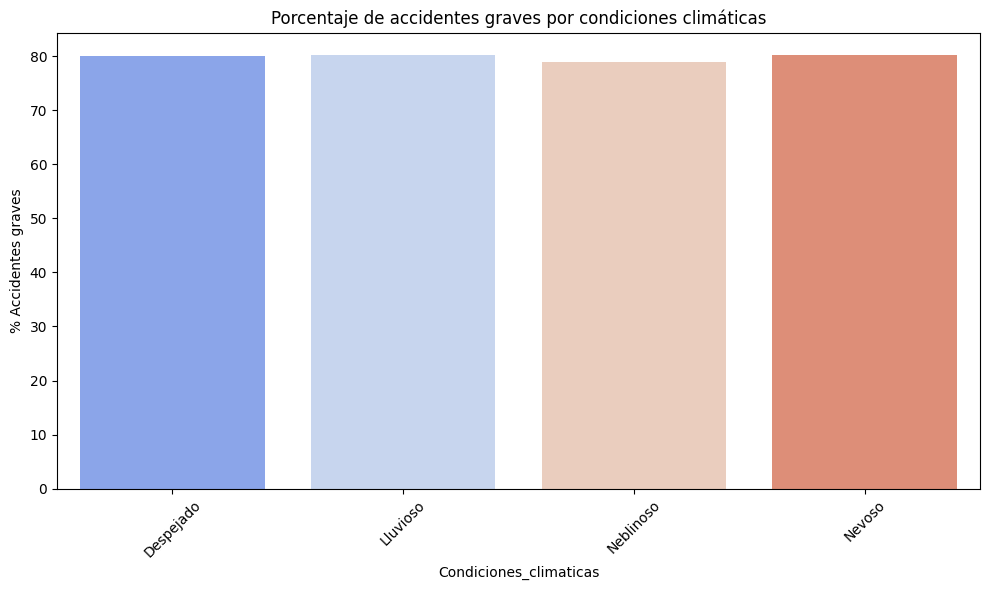

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cond_clima_gravedad.reset_index(), x='Condiciones_climaticas', y='Porcentaje_Graves', palette='coolwarm')
plt.title('Porcentaje de accidentes graves por condiciones climáticas')
plt.ylabel('% Accidentes graves')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Porcentaje de accidentes graves según las condiciones climáticas en las que ocurrieron.
Se puede señalar que los porcentajes de accidentes graves son altos en todas las condiciones (casi un 80%), lo que indica que la gravedad del accidente no varía significativamente entre condiciones climática.


### 2. ¿Cómo influyen la edad y el sexo del conductor en la gravedad del accidente?
Se calcula la edad promedio por sexo y tipo de gravedad.

In [36]:

edad_sexo_gravedad = df_data.groupby(['Sexo_del_conductor', 'Accidente_Grave'])['Edad_del_conductor'].mean().unstack()
edad_sexo_gravedad


Accidente_Grave,0,1
Sexo_del_conductor,,
Femenino,48.966303,42.016444
Masculino,39.250508,33.320159


### Edad promedio por sexo y gravedad (heatmap)

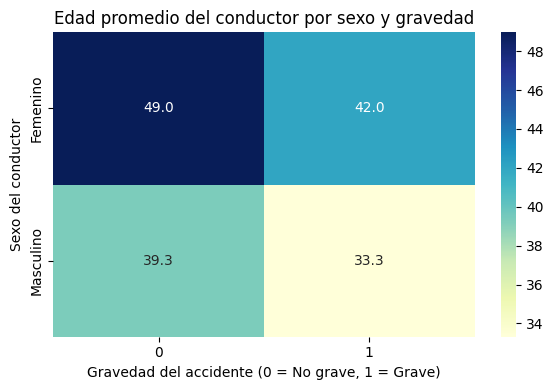

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(edad_sexo_gravedad, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Edad promedio del conductor por sexo y gravedad')
plt.ylabel('Sexo del conductor')
plt.xlabel('Gravedad del accidente (0 = No grave, 1 = Grave)')
plt.tight_layout()
plt.show()

Edad Promedio Del Conductor Por Sexo Y Gravedad Del Accidente. Se puede señalar que en general, los conductores que sufren accidentes graves tienden a ser más jóvenes que los de accidentes no graves. Las conductoras mujeres presentan una edad promedio mayor que los hombres tanto en accidentes graves como no graves.Los hombres involucrados en accidentes graves son, en promedio, los más jóvenes del grupo.

### 3. ¿Existen diferencias en la gravedad de los accidentes entre áreas urbanas y rurales?
Se compara el porcentaje de accidentes graves entre zonas urbanas y rurales.

In [38]:

urbano_gravedad = df_data.groupby(['Urbano/Rural', 'Accidente_Grave']).size().unstack(fill_value=0)
urbano_gravedad['Porcentaje_Graves'] = urbano_gravedad[1] / (urbano_gravedad[0] + urbano_gravedad[1]) * 100
urbano_gravedad


Accidente_Grave,0,1,Porcentaje_Graves
Urbano/Rural,,,
Rural,743,2267,75.315615
Urbano,1743,7672,81.486989


### Accidentes graves por zona (barras)

<ipython-input-39-6f06f460ef6e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




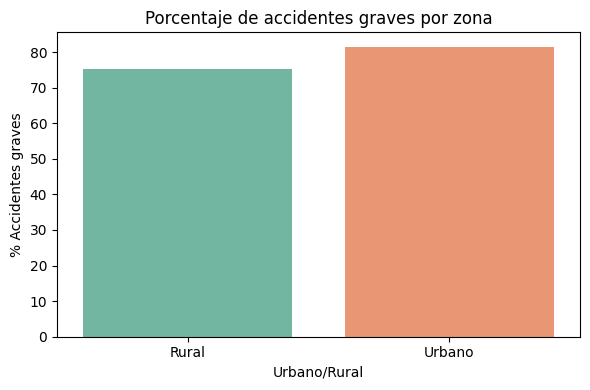

In [39]:
plt.figure(figsize=(6, 4))
sns.barplot(data=urbano_gravedad.reset_index(), x='Urbano/Rural', y='Porcentaje_Graves', palette='Set2')
plt.title('Porcentaje de accidentes graves por zona')
plt.ylabel('% Accidentes graves')
plt.tight_layout()
plt.show()

Porcentaje de accidentes graves según la zona donde ocurrieron.  Se puede señalar en zonas urbanas, el porcentaje de accidentes graves es ligeramente mayor que en zonas rurales(81% vs 75%). Esto podría estar relacionado con:
Mayor densidad vehicular. Más interacciones con peatones, ciclistas y motociclistas. Y alta velocidad o mayor severidad del impacto en ciertos sectores urbanos.

### 4. ¿Qué causas de accidentes son más frecuentes en cada país?

Se identifica la causa más reportada en cada país.

In [40]:

causa_por_pais = df_data.groupby(['Pais', 'Causa_del_accidente']).size().reset_index(name='Cantidad')
causa_mas_frecuente = causa_por_pais.sort_values(['Pais', 'Cantidad'], ascending=[True, False]).groupby('Pais').first().reset_index()
causa_mas_frecuente

,Pais,Causa_del_accidente,Cantidad
0,Brasil,Error humano,1110
1,Canada,Error humano,1068
2,China,Error humano,1016
3,EE.UU,Error humano,1094
4,India,Error humano,1069
5,Japon,Error humano,1063
6,Reino Unido,Error humano,1009
7,Rusia,Error humano,1001


### Causa más frecuente por país (barras)

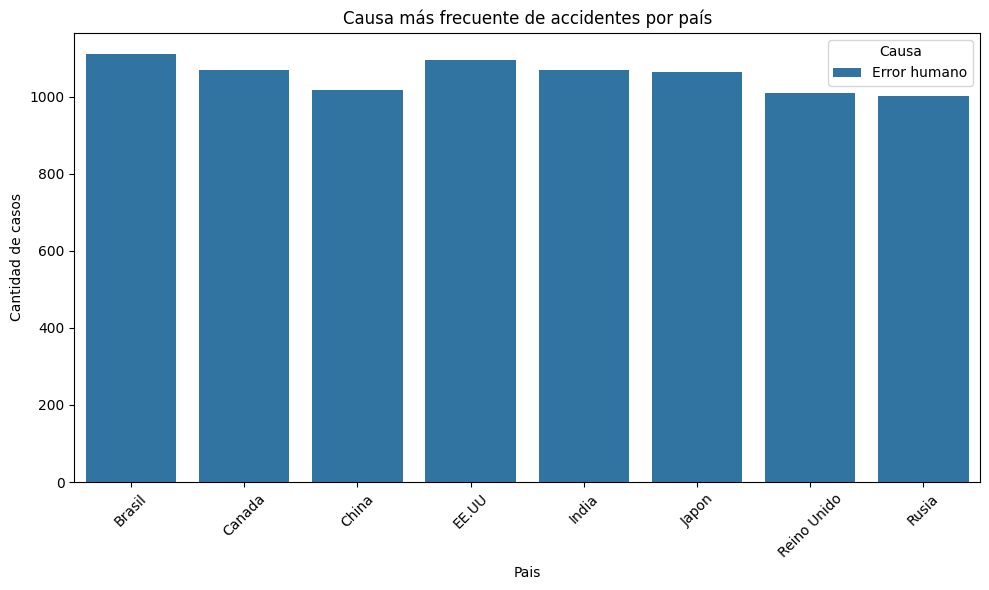

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=causa_mas_frecuente, x='Pais', y='Cantidad', hue='Causa_del_accidente')
plt.title('Causa más frecuente de accidentes por país')
plt.ylabel('Cantidad de casos')
plt.xticks(rotation=45)
plt.legend(title='Causa')
plt.tight_layout()
plt.show()

Causa más frecuente de accidentes en distintos países. Se puede señalar que el error humano es la causa predominante de accidentes en todos los países del gráfico. Brasil y EE.UU. presentan las mayores cantidades de casos relacionados
con error humano, donde las fallas humanas como distracción, imprudencia, o decisiones incorrectas tienen un rol fundamental en la seguridad vial.




## Conclusión general del proyecto

Este proyecto permitió analizar más de 12 mil accidentes de tránsito ocurridos entre 2022 y 2024 en ocho países.

A partir de la transformación del dataset y la creación de una variable binaria (`Accidente_Grave`), se entrenó un modelo de clasificación con un desempeño:

- El modelo detecta correctamente el 94% de los casos no graves.
- Tiene una precisión del 62% en casos graves.
- Las condiciones climáticas como niebla y nieve, las zonas rurales, y ciertos perfiles de conductor mostraron mayor incidencia en accidentes graves.
- Las causas más comunes varían entre países, siendo el error humano el más frecuente (que considera situaciones como exceso de velocidad, la distracción y el estado de ebriedad).

En resumen, se logró cumplir con el objetivo de construir un modelo predictivo confiable para el análisis preventivo y toma de decisiones en seguridad vial.